# Air Pollution Forecasting

***In this notebook, we'll be performing predictions on a dataset, containing information about air pollution in Beijing, China. The data is structured like this:***

**1)** No: row number    
**2)** year: year of data in this row    
**3)** month: month of data in this row    
**4)** day: day of data in this row    
**5)** hour: hour of data in this row    
**6)** pm2.5: PM2.5 concentration   
**7)** DEWP: Dew Point    
**8)** TEMP: Temperature    
**9)** PRES: Pressure   
**10)** cbwd: Combined wind direction   
**11)** Iws: Cumulated wind speed   
**12)** Is: Cumulated hours of snow  
**13)** Ir: Cumulated hours of rain  

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

dataset = pd.read_csv('pollution.csv',
                      parse_dates = [['year', 'month', 'day', 'hour']],
                      index_col = 0,
                      date_parser = parse)
dataset.drop('No', axis = 1, inplace = True)

In [3]:
dataset.head(30)

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
2010-01-01 05:00:00,NaN,-19,-10.0,1017.0,NW,16.10,0,0
2010-01-01 06:00:00,NaN,-19,-9.0,1017.0,NW,19.23,0,0
2010-01-01 07:00:00,NaN,-19,-9.0,1017.0,NW,21.02,0,0
2010-01-01 08:00:00,NaN,-19,-9.0,1017.0,NW,24.15,0,0


In [4]:
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'

***It seems there aren't entries for the pollution during the first 24 hours, so we'll be dropping that part of the dataset. We'll be replacing any other NaN values with 0 for now.***

In [5]:
dataset = dataset[24:]
dataset['pollution'].fillna(0, inplace = True)
dataset.head(10)

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
2010-01-02 05:00:00,109.0,-7,-6.0,1022.0,SE,7.14,3,0
2010-01-02 06:00:00,105.0,-7,-6.0,1023.0,SE,8.93,4,0
2010-01-02 07:00:00,124.0,-7,-5.0,1024.0,SE,10.72,0,0
2010-01-02 08:00:00,120.0,-8,-6.0,1024.0,SE,12.51,0,0


***After some very simple preprocessing, we now have ready to use data.***

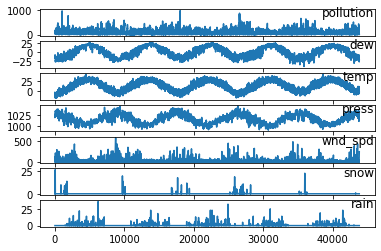

In [7]:
import matplotlib.pyplot as plt

values = dataset.values
groups = [0, 1, 2, 3, 5, 6, 7] # Plotting every non-categorical value
i = 1

plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y = 0.5, loc='right')
    i += 1
plt.show()

In [8]:
dataset.cov()

,pollution,dew,temp,press,wnd_spd,snow,rain
pollution,8510.482477,209.767929,-102.135660,-43.155859,-1081.510928,1.559528,-6.407805
dew,209.767929,208.205461,145.052487,-115.416211,-214.170942,-0.378449,2.555511
temp,-102.135660,145.052487,148.678617,-103.601894,-94.482201,-0.859948,0.846820
press,-43.155859,-115.416211,-103.601894,105.501894,95.249091,0.539288,-1.161417
wnd_spd,-1081.510928,-214.170942,-94.482201,95.249091,2502.273420,0.832319,-0.718127
snow,1.559528,-0.378449,-0.859948,0.539288,0.832319,0.578485,-0.010290
rain,-6.407805,2.555511,0.846820,-1.161417,-0.718127,-0.010290,2.005756


***As we can expect from weather data, there is huge correlation (covariance) between almost every pair of independent variables.***

In [16]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]

    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    agg = pd.concat(cols, axis=1)
    agg.columns = names

    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
values[:, 4] = encoder.fit_transform(values[:, 4])
values = values.astype('float32')

scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(values)

reframed = series_to_supervised(scaled, 1, 1)

reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis = 1, inplace = True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658


***We now have a dataframe, ready to fit our LSTM newtork on.***

In [18]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


Epoch 1/50
137/137 - 6s - loss: 0.0563 - val_loss: 0.0590
Epoch 2/50
137/137 - 2s - loss: 0.0360 - val_loss: 0.0587
Epoch 3/50
137/137 - 2s - loss: 0.0203 - val_loss: 0.0516
Epoch 4/50
137/137 - 2s - loss: 0.0168 - val_loss: 0.0330
Epoch 5/50
137/137 - 2s - loss: 0.0157 - val_loss: 0.0254
Epoch 6/50
137/137 - 2s - loss: 0.0154 - val_loss: 0.0233
Epoch 7/50
137/137 - 2s - loss: 0.0149 - val_loss: 0.0211
Epoch 8/50
137/137 - 2s - loss: 0.0148 - val_loss: 0.0202
Epoch 9/50
137/137 - 2s - loss: 0.0149 - val_loss: 0.0180
Epoch 10/50
137/137 - 2s - loss: 0.0149 - val_loss: 0.0167
Epoch 11/50
137/137 - 2s - loss: 0.0149 - val_loss: 0.0166
Epoch 12/50
137/137 - 2s - loss: 0.0147 - val_loss: 0.0163
Epoch 13/50
137/137 - 2s - loss: 0.0148 - val_loss: 0.0157
Epoch 14/50
137/137 - 2s - loss: 0.0146 - val_loss: 0.0163
Epoch 15/50
137/137 - 2s - loss: 0.0148 - val_loss: 0.0154
Epoch 16/50
137/137 - 2s - loss: 0.0146 - val_loss: 0.0157
Epoch 17/50
137/137 - 2s - loss: 0.0146 - val_loss: 0.0153
Epoch 

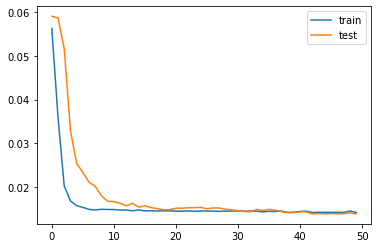

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, input_shape = (train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss = 'mae', optimizer = 'adam')

history = model.fit(train_X, train_y, epochs = 50,
                    batch_size = 64, validation_data = (test_X, test_y),
                    verbose = 2, shuffle = False)

plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()